In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 2D simple sampling method

![](https://raw.githubusercontent.com/risan95/Machine-Learning-Theory/master/img/PRML-Simple%20Sampling.PNG)  
picture refrence: *PRML*

Target: Sampling $p(y)$, ($h(y)=\int p(y)dy$)  
Given:$Z\sim U(0,1)$  
Method: we can let $Y=h^{-1}(Z)$ so $Y\sim p(y)$.

Proof:  
If $Y=h^{-1}(Z)$, then $Z=h(Y)$

Since $Z\sim U(0,1)$,
$$
F_Z(z)=P\{Z\leqslant z\}=z
$$

Since $Z=h(Y)$ and $h(Y)$ is a monotonically increasing function,
$$
\begin{eqnarray}
P\{h(Y)\leqslant z\}&=&z\\
P\{Y\leqslant h^{-1}(z)\}&=&z\\
F_Y(y)&=&z\\
F_Y'(y)&=&z'\\
f_Y(y)&=&h'(y)=p(y)\\
\end{eqnarray}
$$

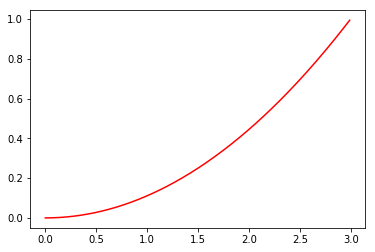

In [7]:
# 2D sampling
%matplotlib inline
# Create a target distribution p(x)=(1/9)x^2, x:(0,3)
x = np.arange(0.00, 3.00, 0.01)
p_x = 1/9 * np.power(x, 2)

# Show the target
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, p_x, "r")

# Copy
target_x = x
target_p_x = p_x

Since
$$
\begin{eqnarray}
p(x)&=&\frac{1}{9}x^2\\
h(x)&=&\frac{1}{27}x^3
\end{eqnarray}
$$

Let
$$
\begin{eqnarray}
Z&=&h(X)=\frac{1}{27}X^3\\
X&=&3\sqrt[3] Z
\end{eqnarray}
$$

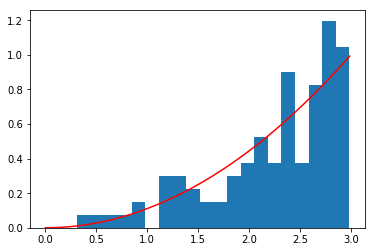

In [8]:
# Sampling for 100 times
n = 100
X = []
for i in range(n):
    z = np.random.uniform()
    x = 3 * np.power(z, 1/3)
    X.append(x)

# Show the histogram
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(X, bins=20, density=True)
ax.plot(target_x, target_p_x, "r")

# 3D simple sampling method

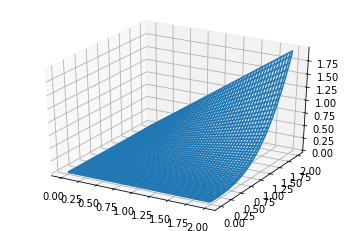

In [9]:
# Create a target distribution
# p(x,y)=(1/8) * x * y^3, x:(0,2), y:(0,2)

x, y = [np.arange(0, 2, 0.01), np.arange(0, 2, 0.01)]
X, Y = np.meshgrid(x, y)
p_X_Y = 1/8 * X * np.power(Y, 3)

# Show the target
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_wireframe(X, Y, p_X_Y)

When given Y
$$
h(x)=\frac{1}{16} x^2y^3
$$
Considor of Normalization:
$$
\begin{eqnarray}
h(x) |_0^2&=&1\\
h(x)&=&\frac{1}{4}x^2
\end{eqnarray}
$$

Let
$$
\begin{eqnarray}
Z&=&h(X)\\
X&=&2\sqrt{Z}
\end{eqnarray}
$$


When given X
$$
h(y)=\frac{1}{32} xy^4
$$
Considor of Normalization:
$$
\begin{eqnarray}
h(y) |_0^2&=&1\\
h(y)&=&\frac{1}{32}y^4
\end{eqnarray}
$$

Let
$$
\begin{eqnarray}
Z&=&h(Y)\\
Y&=&2\sqrt[4]{Z}
\end{eqnarray}
$$

In [16]:
# Sampling Loop function
def Gibbs_Sampling(n, init_x, init_y):
    x, y = init_x, init_y
    X, Y = [], []
    
    for i in range(n):
        z = np.random.uniform()
        x = 2 * np.power(z, 1/2)
        X.append(x)
        
        z = np.random.uniform()
        y = 2 * np.power(z, 1/4)
        Y.append(y)
    
    return [X, Y]

In [11]:
# Draw function
def Draw_3D_histogram(X, Y):
    fig = plt.figure(figsize=(15, 4.8))
    ax1 = fig.add_subplot(121, projection='3d')
    ax2 = fig.add_subplot(122, projection='3d')
    
    # Subplot 1
    # Setting
    Bins = 20
    width = 2 / Bins
    hist, xedges, yedges = np.histogram2d(X, Y, bins=Bins, range=[[0, 2], [0, 2]], density=True)
    hist *= 0.01

    # Position of bars
    xpos, ypos = np.meshgrid(xedges[:-1], yedges[:-1])
    xpos = xpos.ravel()
    ypos = ypos.ravel()
    zpos = 0

    # Construct arrays with the dimensions for the 16 bars.
    dx = dy = width * np.ones_like(zpos)
    dz = hist.ravel()

    ax1.bar3d(xpos, ypos, zpos, dx, dy, dz)
    
    # Subplot 2
    x, y = [np.arange(0, 2, 0.01), np.arange(0, 2, 0.01)]
    X, Y = np.meshgrid(x, y)
    p_X_Y = 1/8 * X * np.power(Y, 3)
    ax2.plot_wireframe(X, Y, p_X_Y)

In [22]:
# X, Y = Gibbs_Sampling(5000, 1, 1)
# Draw_3D_histogram(X, Y)

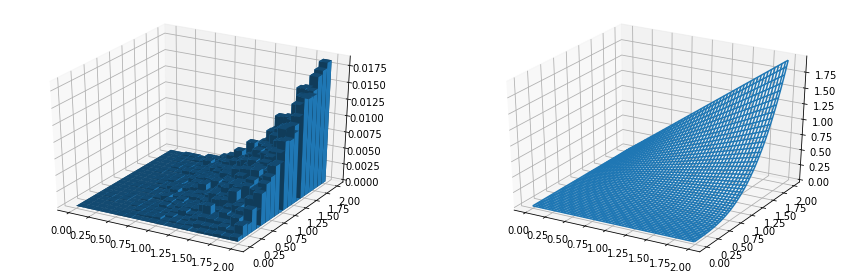

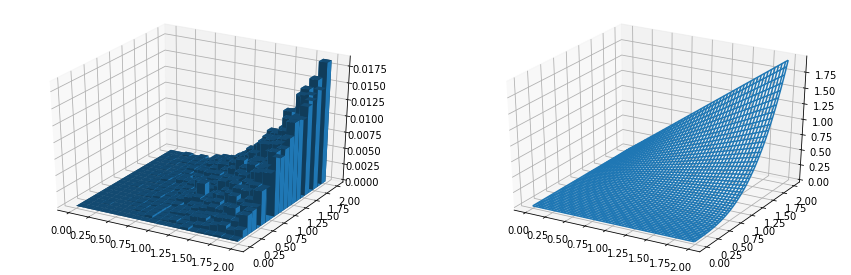

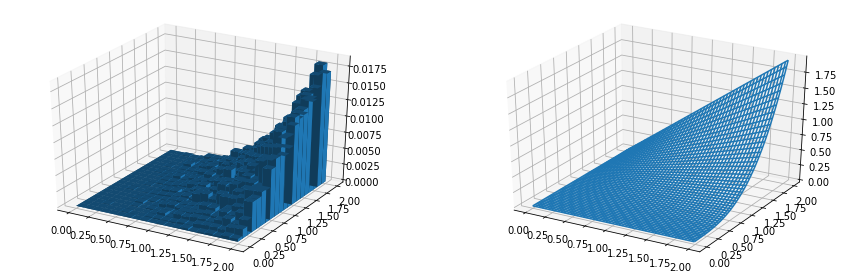

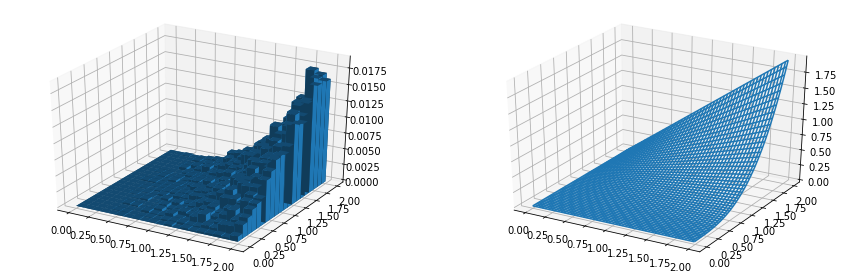

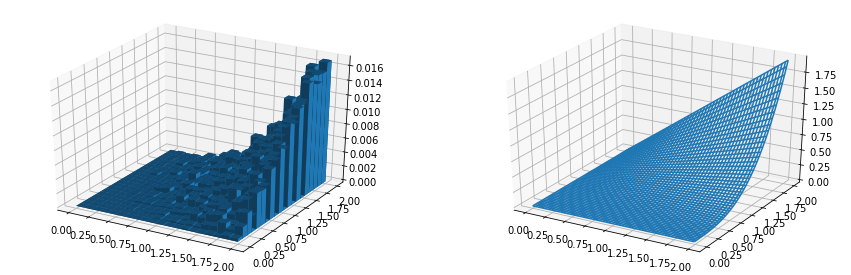

In [27]:
# Initial value for sampling
x, y = np.random.uniform(), np.random.uniform()

n = 10000
r = 5

for i in range(r):
    X, Y = Gibbs_Sampling(n, x, y)
    x, y = X[-1], Y[-1]
    Draw_3D_histogram(X, Y)
